In [449]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [430]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


### Introducción

En el trabajo práctico número 1 se realizaron trabajos de limpieza e imputación de datos en el dataset de propiedades de properati. 
En esta instancia se modelarán distintos escenarios de features y rangos de datos, los modelos serán evaluados mediante métricas de evaluación de modelos. Principalmente trabajarán con modelos de regresión lineal.

### Objetivos
1. Definir escenarios de datos (columnas, y rango de datos)
2. Realizar regresiones lineales multiples los diferentes escenarios de datos.
3. Evaluar cada modelo desarrollado con los diferentes escenarios de datos encontrados.

### Escenarios
1. Escenario 1: Datos sin escalar, todas las features.
2. Escenario 2: Datos sin outliers en la columna precio por metro cuadrado, y superficie, Escalados
3. Escenario 3: Modelo OLS, y eliminando columnas sin importancia significativa.
4. Escenario 4: Idem Escenesario2 pero con Regularizacion Ridge
5. Escenario 5: Idem Escenesario2 pero con Regularizacion Lasso 
6. Escenario 6: Idem Escenario 2 con columnas ameneties

### Desarrollo

El dataset a trabajar es el mismo obtenido del TP1.

In [431]:
data_bsas = pd.read_csv('./Data/data_tp2.csv', index_col= 0)

In [432]:
data_bsas.head(3)

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,rooms,description,title,surface_total_fixed,precio_per_m2,place_category
0,PH,-34.66,-58.51,62000.00,40.00,nan,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,55.00,1127.27,Q1
1,apartment,-34.65,-58.52,72000.00,55.00,nan,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,55.00,1309.09,Q1
2,apartment,-34.56,-58.44,138000.00,40.00,nan,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,45.00,3066.67,Q4


Adicionalmente se creo un df de dummies a partir de la columna description. Estas dummies hacen referencia a la presencia o no de ammenities en la propiedad. Estas columnas dummies serán evaluas con el mejor modelo resultando y se verá si tienen algun peso en la performance del modelo. 

In [433]:
import re

In [434]:
#Buscamos en la columna descripción los atributos que puedan tener valor predictivo

df_amenities_pattern = '(?P<pileta>pileta|piscina)|(?P<nuevo>estrenar|nuevo)|(?P<amenities>amenities)|(?P<monoamb>monoambiente)|(?P<aptoprof>apto profesional)|(?P<contrafrente>contrafrente)|(?P<SUM>sum|sal[óo]n de usos m[úu]ltiples)|(?P<calefa>calefacci[óo]n)|(?P<terraza>terraza)|(?P<parrilla>parrilla)|(?P<galeria>galer[íi]a)|(?P<jardin_patio>jard[íi]n|patio)|(?P<lavadero>lavadero)|(?P<balcon>balc[óo]n)|(?P<gym>gym|gimnasio)|(?P<jacuzzi>jacuzzi|hidromasaje|hidro)|(?P<toillette>toillette|toilet)|(?P<en_suite>suite)|(?P<baulera>baulera)|(?P<escritorio>escritorio)|(?P<al_frente>al frente|a la calle)|(?P<esq_av>esquina|avenida)'

df_amenities = data_bsas["description"].str.extract(df_amenities_pattern, flags=re.IGNORECASE)
all_pattern = '.*[^0]'

df_amenities = df_amenities.fillna(0)
df_amenities = df_amenities.replace(all_pattern, value = 1, regex= True)

df_amenities

,pileta,nuevo,amenities,monoamb,aptoprof,contrafrente,SUM,calefa,terraza,parrilla,...,lavadero,balcon,gym,jacuzzi,toillette,en_suite,baulera,escritorio,al_frente,esq_av
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28438,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [435]:
df_amenities.sum()

pileta           549
nuevo           2912
amenities        828
monoamb         2449
aptoprof         973
contrafrente    1269
SUM              291
calefa           174
terraza          924
parrilla         202
galeria          145
jardin_patio    1883
lavadero         941
balcon          4337
gym               70
jacuzzi           59
toillette        957
en_suite         843
baulera          536
escritorio       458
al_frente       3218
esq_av          2015
dtype: int64

In [436]:
data_bsas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28439 entries, 0 to 28439
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          28439 non-null  object 
 1   lat                    21700 non-null  float64
 2   lon                    21700 non-null  float64
 3   price_aprox_usd        28439 non-null  float64
 4   surface_covered_in_m2  27325 non-null  float64
 5   rooms                  14427 non-null  float64
 6   description            28439 non-null  object 
 7   title                  28439 non-null  object 
 8   surface_total_fixed    28439 non-null  float64
 9   precio_per_m2          28439 non-null  float64
 10  place_category         28439 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.6+ MB


Se analizaron las columnas seleccionadas en el TP1 y se realizó el calculo de dummies y la eliminación de los NA's de las columnas ```lat, lon, rooms, surface_covered_in_m2```. Se tomó esta decisión ya que se evaluaron estratégias de imputación en el TP1 y en esta instancia solo se trabajará con registros completos.

In [437]:
(data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values()

property_type            0.00
price_aprox_usd          0.00
description              0.00
title                    0.00
surface_total_fixed      0.00
precio_per_m2            0.00
place_category           0.00
surface_covered_in_m2    3.92
lat                     23.70
lon                     23.70
rooms                   49.27
dtype: float64

In [438]:
dumm1 = pd.get_dummies(data_bsas["place_category"],drop_first=True).reset_index(drop= True)
dumm2 = pd.get_dummies(data_bsas["property_type"],drop_first=True).reset_index(drop= True)
data_bsas = data_bsas.drop(['rooms','property_type' ,'description', 'title', 'place_category'], axis=1)
print((data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values())



price_aprox_usd          0.00
surface_total_fixed      0.00
precio_per_m2            0.00
surface_covered_in_m2    3.92
lat                     23.70
lon                     23.70
dtype: float64


El dataset final posee 13 columnas incluyendo las dummies Q2...Q4 (categorización de barrios según el cuartil de precios) y la columna de tipo de propiedad.

In [439]:
data_bsas = pd.concat([data_bsas, dumm1, dumm2], axis=1)
data_bsas = data_bsas.dropna().reset_index(drop=True)
print((data_bsas.isna().sum()/data_bsas.shape[0]*100).sort_values())

lat                     0.00
lon                     0.00
price_aprox_usd         0.00
surface_covered_in_m2   0.00
surface_total_fixed     0.00
precio_per_m2           0.00
Q2                      0.00
Q3                      0.00
Q4                      0.00
Q5                      0.00
apartment               0.00
house                   0.00
store                   0.00
dtype: float64


In [440]:
data_bsas

,lat,lon,price_aprox_usd,surface_covered_in_m2,surface_total_fixed,precio_per_m2,Q2,Q3,Q4,Q5,apartment,house,store
0,-34.66,-58.51,62000.00,40.00,55.00,1127.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-34.65,-58.52,72000.00,55.00,55.00,1309.09,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,-34.56,-58.44,138000.00,40.00,45.00,3066.67,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,-34.56,-58.44,195000.00,60.00,65.00,3000.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,-34.65,-58.50,239000.00,98.00,140.00,1707.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,-34.63,-58.46,120000.00,72.00,78.97,1519.57,1.00,0.00,0.00,0.00,1.00,0.00,0.00
21033,-34.62,-58.46,74500.00,33.00,36.19,2058.33,1.00,0.00,0.00,0.00,1.00,0.00,0.00
21034,-34.60,-58.40,165000.00,65.00,91.00,1813.19,0.00,0.00,0.00,1.00,1.00,0.00,0.00
21035,-34.59,-58.40,165000.00,39.00,44.00,3750.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


### Evaluación de Modelos

Para la Evaluación de los modelos y excenarios se construyeron 2 funciones de evaluación. Las metricas elegidas para la evaluación son el ```MAE y R2 Ajustado``` sin embargo tambien se calculan las metricas ```R2 y RMSE``` para su análisis.

La función de evaluación hacer los calculos de las metricas en TEST y TRAIN y a su vez entrega dos gráficos para analizar los residuos en la regresióngráfico para ver 
1. Un histogramas de los residuos, esto permite ver la distribución, asimetria y diferencias entre test y train.
2. Un diagrama de dispersión de los y predichos en test y train.

In [453]:
def model_ev(X_train, X_test, y_train, y_test, model):
  #tabla_errores = []
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train) 
  y_test_pred = model.predict(X_test)

  
  # Calculo de RMSE 
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print(f'RMSE Train: {rmse_train}\n')
  print(f'RMSE Test: {rmse_test}\n')
  
  # Calculo de mae 
  mae_train = mean_absolute_error(y_train,y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  print(f'MAE Train: {mae_train}\n')
  print(f'MAE Test: {mae_test}\n')

  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TRAIN
  SS_Residual_a = sum((y_train - y_train_pred)**2)       
  SS_Total_a = sum((y_train-np.mean(y_train))**2)     
  r_squared_tra = 1 - (float(SS_Residual_a))/SS_Total_a
  adjusted_r_squared_tra = 1 - (1-r_squared_tra)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(train)= {r_squared_tra}")
  print(f"R^2_ajt(train)= {adjusted_r_squared_tra}\n")
  
  # Calculo de R cuadrado y R cuadrado ajustado del conjunto TEST
  SS_Residual_b = sum((y_test - y_test_pred)**2)       
  SS_Total_b = sum((y_test-np.mean(y_test))**2)     
  r_squared_te = 1 - (float(SS_Residual_b))/SS_Total_b
  adjusted_r_squared_te = 1 - (1-r_squared_te)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print(f"R^2(test)= {r_squared_te}") 
  print(f"R^2_ajt(test)= {adjusted_r_squared_te}\n")
  
  #Histograma de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()

  #Scatter de y vs y-predicho para lo testeado:
  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)
  return {'MAE TRAIN':mae_train, 'MAE TEST':mae_test, 'R^2_ajt(train)':adjusted_r_squared_tra, 'R^2_ajt(test)': adjusted_r_squared_te}

De manera similar se confeccionó una función de evaluación usando CV para conocer mejor como se comporta el modelo usando CV.

In [451]:
def model_ev_cv(model, descr, X_, y_, folds): 
    resultado = cross_validate(model,
                            X_,
                            y_, 
                            cv=folds, 
                            scoring = ('neg_root_mean_squared_error','r2', 'neg_mean_absolute_error'),
                            return_train_score= True 
                            ) 
    mae_test = np.mean(resultado['test_neg_mean_absolute_error']*-1)
    mae_train = np.mean(resultado['train_neg_mean_absolute_error']*-1)
    return print(f'{descr} \n MAE TEST: {mae_test}, MAE TRAIN:  {mae_train}')

#### Escenario 1 - Datos crudos con outliers

Como se puede observar en las siguientes graficas tanto la columna target (precio por metro cuadrado) como las columnas predictoras (p. ej: superficie total) posee outliers.

In [415]:
def histo_boxplot(df, col:str):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # assigning a graph to each ax
    sns.boxplot(data = df, x= col, ax=ax_box)
    sns.histplot(df[col], ax=ax_hist)
    
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.gcf().set_size_inches(15, 8)
    plt.show()

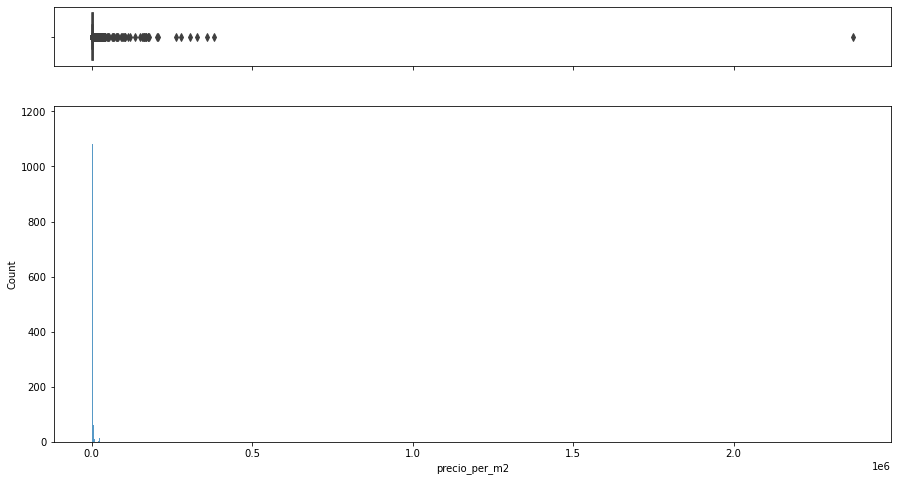

In [416]:
histo_boxplot(data_bsas, 'precio_per_m2')

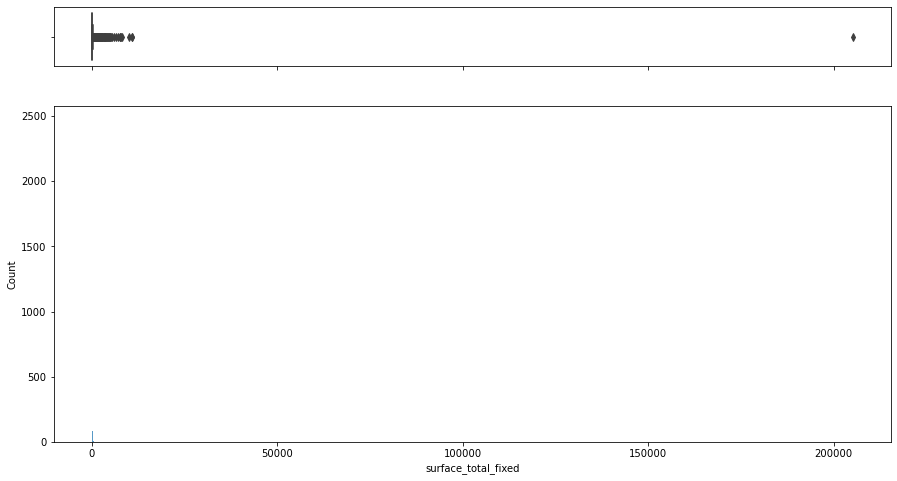

In [417]:
histo_boxplot(data_bsas, 'surface_total_fixed')

In [442]:
data_bsas.describe(percentiles=[.05,.10,.25,.5,.75,.90,.95])

,lat,lon,price_aprox_usd,surface_covered_in_m2,surface_total_fixed,precio_per_m2,Q2,Q3,Q4,Q5,apartment,house,store
count,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00
mean,-34.60,-58.44,258333.53,102.11,118.45,3102.48,0.21,0.20,0.19,0.18,0.83,0.06,0.04
std,0.03,0.04,362629.65,1305.02,1432.00,17973.55,0.41,0.40,0.40,0.39,0.38,0.23,0.20
min,-34.70,-58.54,5103.61,0.00,1.10,2.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,-34.64,-58.50,69900.00,27.00,30.00,1139.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,-34.63,-58.49,79000.00,31.00,34.00,1428.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-34.62,-58.46,104000.00,39.00,43.87,1875.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,-34.60,-58.44,155000.00,58.00,66.00,2341.46,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,-34.58,-58.40,270000.00,100.00,115.00,2916.67,0.00,0.00,0.00,0.00,1.00,0.00,0.00
90%,-34.56,-58.38,500000.00,175.00,207.00,3883.36,1.00,1.00,1.00,1.00,1.00,0.00,0.00


In [443]:
X = data_bsas.drop(['price_aprox_usd','precio_per_m2'],axis=1)
y = data_bsas['precio_per_m2']

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [445]:
linreg = LinearRegression()
modelLreg = linreg.fit(X_train, y_train)

In [446]:
linreg.coef_

array([-4.25598655e+03,  3.88791464e+03,  4.60521143e+00, -4.24513999e+00,
        3.73841856e+02,  5.07622048e+02,  1.59546813e+03,  2.48349412e+03,
       -3.65823276e+02,  8.00136288e+02, -5.17815139e+02])

In [447]:
linreg.intercept_

82462.23217792455

El modelo resultante en el primer escenario resulto tener un R^2 ajustado extremadamente bajo, esto indica que muy poca variabilidad de la variable target es predicha por el modelo. Los valores de error absoluto MAE son del orden de 1430 uds/m^2. 
Los graficos de evaluacion muestran que los errores no tienen valores centrados en cero el grafico de disperción de los yreal con los ypred muestran que el modelo esta siendo afectado por los outliers del precio por metro cuadrado.

RMSE Train: 21006.263091471814

RMSE Test: 6675.700125475052

MAE Train: 1647.0473327169839

MAE Test: 1430.2027629171052

R^2(train)= 0.0019692108778800455
R^2_ajt(train)= 0.0014470544602654956

R^2(test)= 0.013164923929479544
R^2_ajt(test)= 0.012648624959835097



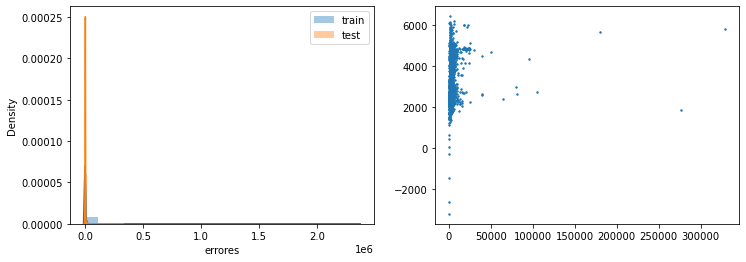

In [455]:
Escenario1 = model_ev(X_train,X_test,y_train,y_test, modelLreg)

In [456]:
Escenario1

{'MAE TRAIN': 1647.0473327169839,
 'MAE TEST': 1430.2027629171052,
 'R^2_ajt(train)': 0.0014470544602654956,
 'R^2_ajt(test)': 0.012648624959835097}

In [457]:
model_ev_cv(modelLreg,"Escenario 1 - RegLineal Datos Crudos", X_test, y_test,10)

Escenario 1 - RegLineal Datos Crudos 
 MAE TEST: 1277.8962728540696, MAE TRAIN:  1270.8516708255527


#### Escenario 2 - Sin Outliers

Para conocer los outliers de manera numerica de procedio a calcular los percentiles. 
Las columnas que nos interesan son:
1. Columna Target (precio por metro cuadrado)
2. Columna superficie 
Eliminando los outliers de ambas columnas es posible tener un set más homogeneo.

In [503]:
data_bsas.describe(percentiles=[.025,.10,.25,.5,.75,.90,.975])


,lat,lon,price_aprox_usd,surface_covered_in_m2,surface_total_fixed,precio_per_m2,Q2,Q3,Q4,Q5,apartment,house,store
count,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00,21037.00
mean,-34.60,-58.44,258333.53,102.11,118.45,3102.48,0.21,0.20,0.19,0.18,0.83,0.06,0.04
std,0.03,0.04,362629.65,1305.02,1432.00,17973.55,0.41,0.40,0.40,0.39,0.38,0.23,0.20
min,-34.70,-58.54,5103.61,0.00,1.10,2.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2.5%,-34.65,-58.51,61000.00,22.00,24.96,940.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,-34.63,-58.49,79000.00,31.00,34.00,1428.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-34.62,-58.46,104000.00,39.00,43.87,1875.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,-34.60,-58.44,155000.00,58.00,66.00,2341.46,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,-34.58,-58.40,270000.00,100.00,115.00,2916.67,0.00,0.00,0.00,0.00,1.00,0.00,0.00
90%,-34.56,-58.38,500000.00,175.00,207.00,3883.36,1.00,1.00,1.00,1.00,1.00,0.00,0.00


Se desidió dejar el 5% de los datos ubicados en los extremos, es decir trabajaremos con los datos entre el percentil 2,5 y 97.5.

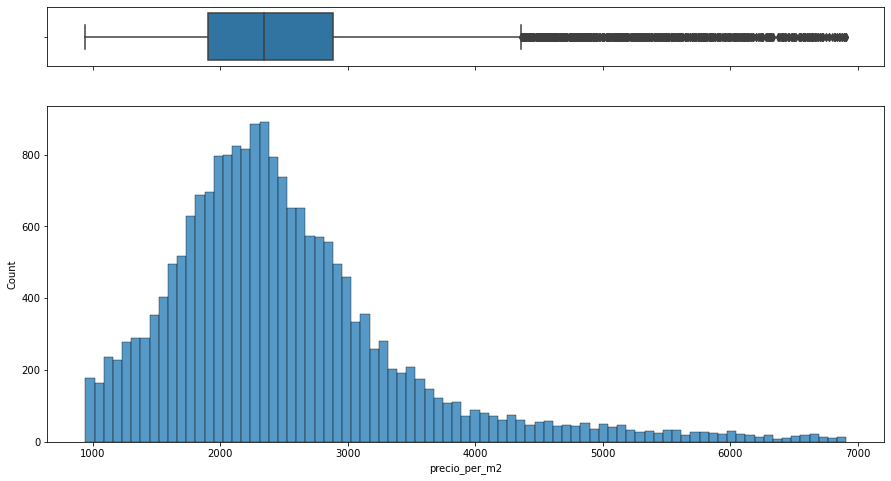

In [504]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data = data_bsas.loc[(data_bsas['precio_per_m2']<6910.76)&(data_bsas['precio_per_m2']>940)], x= 'precio_per_m2', ax=ax_box)
sns.histplot(data_bsas.loc[(data_bsas['precio_per_m2']<6910.76)&(data_bsas['precio_per_m2']>940)]['precio_per_m2'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [505]:
data2 = data_bsas.loc[(data_bsas['precio_per_m2']<6910.76)&(data_bsas['precio_per_m2']>940)]

Sin embarho no es la unica columna que tiene outliers, es decir elimnado estos datos aun quedan datos anómalos en la columna superficie total. Se hará un proceso similar. 

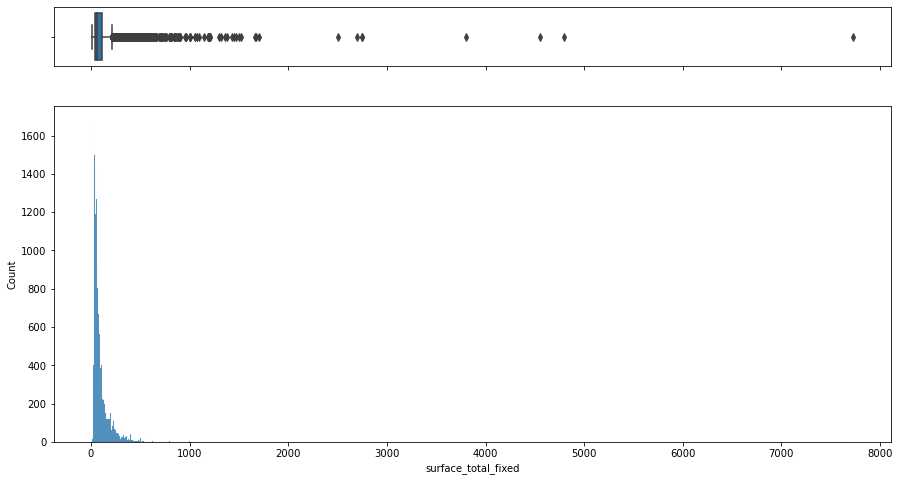

In [506]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data = data2, x= 'surface_total_fixed', ax=ax_box)
sns.histplot(data2['surface_total_fixed'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [556]:
data2.describe(percentiles=[.025,.10,.25,.5,.75,.90,.975])

,lat,lon,price_aprox_usd,surface_covered_in_m2,surface_total_fixed,precio_per_m2,Q2,Q3,Q4,Q5,apartment,house,store
count,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00,18981.00
mean,-34.60,-58.44,217964.45,76.27,87.33,2498.94,0.22,0.21,0.20,0.17,0.85,0.05,0.04
std,0.03,0.04,200821.38,52.95,61.27,931.76,0.42,0.41,0.40,0.38,0.36,0.22,0.19
min,-34.70,-58.54,30000.00,0.00,26.32,940.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2.5%,-34.64,-58.51,66000.00,28.00,30.00,1153.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,-34.63,-58.49,81000.00,33.00,36.00,1535.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-34.62,-58.46,105000.00,40.00,45.00,1907.54,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,-34.60,-58.44,150000.00,58.00,65.81,2335.56,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,-34.58,-58.40,250000.00,92.00,108.00,2864.63,0.00,0.00,0.00,0.00,1.00,0.00,0.00
90%,-34.56,-58.38,420000.00,150.00,174.39,3575.76,1.00,1.00,1.00,1.00,1.00,0.00,0.00


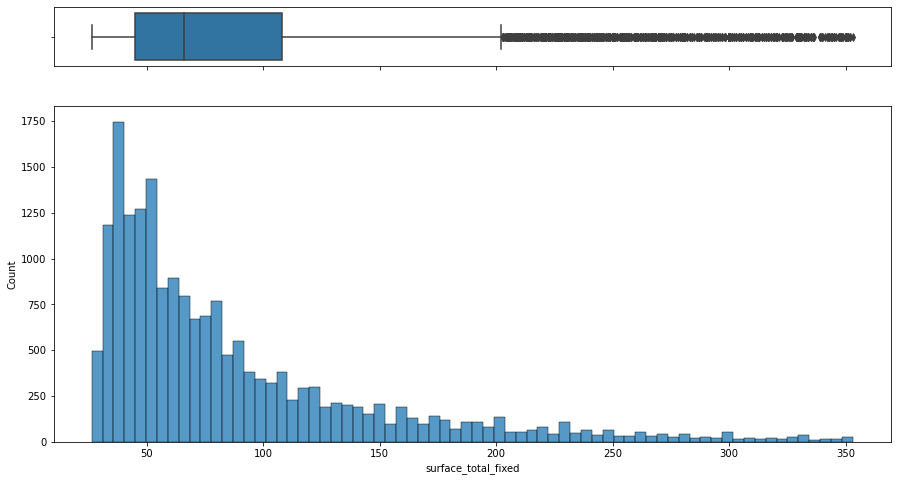

In [508]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data = data2.loc[(data2['surface_total_fixed']<353.41)&(data2['surface_total_fixed']>26.00)], x= 'surface_total_fixed', ax=ax_box)
sns.histplot(data2.loc[(data2['surface_total_fixed']<353.41)&(data2['surface_total_fixed']>26.00)]['surface_total_fixed'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [553]:
data2 = data2.loc[(data2['surface_total_fixed']<353.41)&(data2['surface_total_fixed']>26)]

Es decir se eliminaron 2056 filas.

In [557]:
data_bsas.shape[0] - data2.shape[0]

2056

In [558]:
data2

,lat,lon,price_aprox_usd,surface_covered_in_m2,surface_total_fixed,precio_per_m2,Q2,Q3,Q4,Q5,apartment,house,store
0,-34.66,-58.51,62000.00,40.00,55.00,1127.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-34.65,-58.52,72000.00,55.00,55.00,1309.09,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,-34.56,-58.44,138000.00,40.00,45.00,3066.67,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,-34.56,-58.44,195000.00,60.00,65.00,3000.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,-34.65,-58.50,239000.00,98.00,140.00,1707.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,-34.63,-58.46,120000.00,72.00,78.97,1519.57,1.00,0.00,0.00,0.00,1.00,0.00,0.00
21033,-34.62,-58.46,74500.00,33.00,36.19,2058.33,1.00,0.00,0.00,0.00,1.00,0.00,0.00
21034,-34.60,-58.40,165000.00,65.00,91.00,1813.19,0.00,0.00,0.00,1.00,1.00,0.00,0.00
21035,-34.59,-58.40,165000.00,39.00,44.00,3750.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [541]:
X = data2.drop(['price_aprox_usd','precio_per_m2'],axis=1)
y = data2['precio_per_m2']

In [542]:
y

0       1127.27
1       1309.09
2       3066.67
3       3000.00
4       1707.14
          ...  
21032   1519.57
21033   2058.33
21034   1813.19
21035   3750.00
21036   2858.70
Name: precio_per_m2, Length: 18981, dtype: float64

In [551]:
print(f'X: {X.shape}, y: {y.shape}')

X: (18981, 11), y: (18981,)


In [513]:
scl = StandardScaler()
X = scl.fit_transform(X)
X = pd.DataFrame(X)


In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [516]:
linreg_sc = LinearRegression()
modelLreg_sc_sinout = linreg_sc.fit(X_train, y_train)

RMSE Train: 765.3001182540057

RMSE Test: 778.5096801443375

MAE Train: 535.2838723430955

MAE Test: 545.4446271759178

R^2(train)= 0.3235490943718782
R^2_ajt(train)= 0.3231568248815566

R^2(test)= 0.306172767855
R^2_ajt(test)= 0.3057704219456956



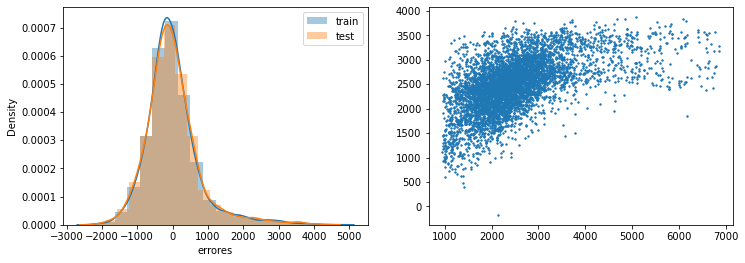

In [517]:
Escenario2 = model_ev(X_train,X_test,y_train,y_test, modelLreg_sc_sinout)

In [518]:
model_ev_cv(modelLreg_sc_sinout,"Escenario 2 - RegLineal Datos Sin Outliers Escalados", X_test, y_test,10)

Escenario 2 - RegLineal Datos Sin Outliers Escalados 
 MAE TEST: 547.8915747511064, MAE TRAIN:  546.5539131801462


In [519]:
Escenario2

{'MAE TRAIN': 535.2838723430955,
 'MAE TEST': 545.4446271759178,
 'R^2_ajt(train)': 0.3231568248815566,
 'R^2_ajt(test)': 0.3057704219456956}

In [520]:
pd.DataFrame({'Escenario 1': Escenario1, 'Escenario 2': Escenario2})

,Escenario 1,Escenario 2
MAE TRAIN,1647.05,535.28
MAE TEST,1430.20,545.44
R^2_ajt(train),0.00,0.32
R^2_ajt(test),0.01,0.31


La técnica de eliminación de outliers y escalado de columnas predictoras funcionó positivamente. La mejora fue tanto en el R^2 como en el MAE. El escenario 2 obtuvo un R^2 = 0.31 (test) y un MAE = 545 (test). 
A su vez se aprecia una mejora en el histograma de errores centrandose en 0, sin embargo el diagrama de dispersión de los ypred y los y yreales no presenta buen ajuste. Es posible que los outliers sigan afectando al modelo sobre todo para precios mayores a 4000 uds/m2.

A modo de entender mejor este modelo se realizó un modelo OLS con la libreria statmodels, el objetivo de esto es conocer los pvalues de cada feature y evaluar si es necesario eliminar alguna del modelo.

In [492]:
import statsmodels.api as sm
import numpy as np


In [493]:
data2.columns

Index(['lat', 'lon', 'price_aprox_usd', 'surface_covered_in_m2',
       'surface_total_fixed', 'precio_per_m2', 'Q2', 'Q3', 'Q4', 'Q5',
       'apartment', 'house', 'store'],
      dtype='object')

In [494]:
x_columns = ['lat', 'lon', 'surface_covered_in_m2',
       'surface_total_fixed',  'Q2', 'Q3', 'Q4', 'Q5',
       'apartment', 'house', 'store']

In [496]:
y = data2['precio_per_m2']

In [498]:
def get_stats():
    x = data2[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:          precio_per_m2   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.578e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:07:53   Log-Likelihood:                     -1.5467e+05
No. Observations:               18981   AIC:                                  3.094e+05
Df Residuals:                   18970   BIC:                                  3.095e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

Como se puede observar la columna dummie ```store``` no es significativa para el modelo. Como se eliminará esta columna y los registros con esta columna en 1 y se correrá nuevamente el modelo a fin de evaluar su mejora.  

#### Escenario 3 - Feature Engeneering

In [596]:
data3 = data2.loc[data2['store']!=1].drop(['store'], axis=1).reset_index(drop=True)

In [597]:
X = data3.drop(['price_aprox_usd','precio_per_m2'],axis=1)
y = data3['precio_per_m2']

In [600]:
col = X.columns.to_list()

In [601]:
scl = StandardScaler()
X = scl.fit_transform(X)
X = pd.DataFrame(X)
X.columns = col
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linreg_sc = LinearRegression()
modelLreg_sc_eng = linreg_sc.fit(X_train, y_train)


RMSE Train: 761.0550115490271

RMSE Test: 756.3368945278656

MAE Train: 533.008079232026

MAE Test: 531.7125850443176

R^2(train)= 0.3234063593733133
R^2_ajt(train)= 0.32303629229426356

R^2(test)= 0.334967944636575
R^2_ajt(test)= 0.3346042012381374



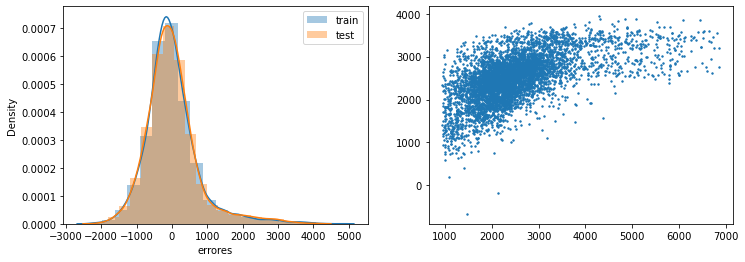

In [602]:
Escenario3 = model_ev(X_train,X_test,y_train,y_test, modelLreg_sc_eng)


In [605]:
model_ev_cv(modelLreg_sc_eng,"Escenario 3 - RegLineal Datos Sin Outliers, Col Escaladas, SIN STORES", X_test, y_test,10)

Escenario 3 - RegLineal Datos Sin Outliers, Col Escaladas, SIN STORES 
 MAE TEST: 532.0656451152457, MAE TRAIN:  531.0421109406163


In [611]:
pd.DataFrame({'Escenario 1': Escenario1, 'Escenario 2': Escenario2, 'Escenario 3': Escenario3})

,Escenario 1,Escenario 2,Escenario 3
MAE TRAIN,1647.05,535.28,533.01
MAE TEST,1430.20,545.44,531.71
R^2_ajt(train),0.00,0.32,0.32
R^2_ajt(test),0.01,0.31,0.33


En este tercer escenario se observó una leve mejora, el modelo se hizo mas específico para casas y departamentos. Las metricas en test y train no son tan diferentes por lo cual no se considera que el modelo esté sobre entrenando. Incluso haciendo este ultimo cambio, disminuyendo la complejidad del modelo no se logró una gran mejora.

#### Escenario 4 y 5 - Regularización
A modo de explorar posibles mejoras en el modelo, se procede a usar la regularización como estrategia de modelado. Se prestará especial atención a la regularización LASSO ya que buscamos conocer si es necesario elimnar alguna columna más.

In [612]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [613]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

1.5
[ 320.38880187  207.66519571  589.22915358 -597.77659233   44.44441525
   86.40967193  144.71924751  298.97193702    6.92184842   21.2493802 ]
2495.6417050214736


RMSE Train: 761.0551623186135

RMSE Test: 756.3339522666503

MAE Train: 533.001392727254

MAE Test: 531.7027283213224

R^2(train)= 0.323406091298729
R^2_ajt(train)= 0.3230360240730542

R^2(test)= 0.3349731187705707
R^2_ajt(test)= 0.33460937820215775



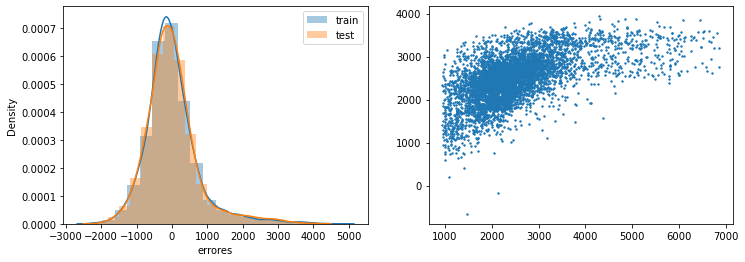

In [614]:
Escenario4 = model_ev(X_train,X_test,y_train,y_test, model_ridge_cv)

In [615]:
model_ev_cv(model_ridge_cv,"Ridge CV", X_test, y_test,10)

Ridge CV 
 MAE TEST: 532.0521266223813, MAE TRAIN:  531.0273561125298


In [616]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

0.3
[ 320.29844528  207.6102916   584.17244313 -592.74393079   43.22594513
   85.20274071  143.57588971  297.92314176    6.67671436   20.41393936]
2495.6317618235203


RMSE Train: 761.0588328477654

RMSE Test: 756.3429634604606

MAE Train: 532.9562283600087

MAE Test: 531.63347817713

R^2(train)= 0.32339956492908006
R^2_ajt(train)= 0.3230294941337669

R^2(test)= 0.3349572720092321
R^2_ajt(test)= 0.3345935227733349



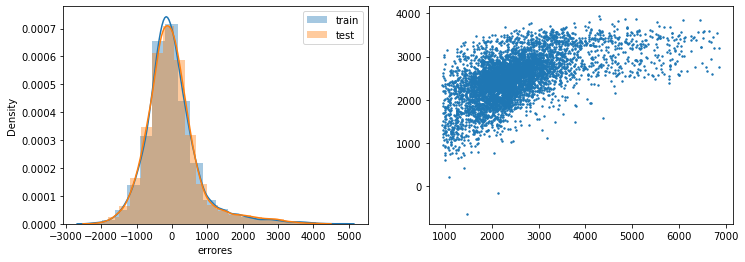

In [617]:
Escenario5 = model_ev(X_train,X_test,y_train,y_test, model_lasso_cv)

In [618]:
model_ev_cv(model_lasso_cv,"Lasso CV", X_test, y_test,10)

Lasso CV 
 MAE TEST: 531.9964592644734, MAE TRAIN:  530.971876954696


In [619]:
pd.DataFrame({
    'Escenario 1': Escenario1, 
    'Escenario 2': Escenario2, 
    'Escenario 3': Escenario3,
    'Escenario 4': Escenario4,
    'Escenario 5': Escenario5
})

,Escenario 1,Escenario 2,Escenario 3,Escenario 4,Escenario 5
MAE TRAIN,1647.05,535.28,533.01,533.00,532.96
MAE TEST,1430.20,545.44,531.71,531.70,531.63
R^2_ajt(train),0.00,0.32,0.32,0.32,0.32
R^2_ajt(test),0.01,0.31,0.33,0.33,0.33


No se observan grandes mejoras usando regularización, la regularización L2 - Lasso no mostró que penalize alguna columna. 
Como conclusión final se puede decir que se decide optar por un modelo generalizar que incluya todos los tipos de propiedades.

#### Escenario 6 - Usando el df de Ameneties

In [650]:
data_bsas2 = pd.read_csv('./Data/data_tp2.csv', index_col= 0)

In [647]:
data_bsas2.shape

(28439, 11)

In [648]:
df_amenities.shape

(28439, 22)

In [652]:
data_bsas2 = pd.concat([data_bsas2, dumm1, dumm2, df_amenities], axis=1)
data_bsas2=data_bsas2.drop(['rooms','property_type' ,'description', 'title', 'place_category'], axis=1)
data_bsas2 = data_bsas2.dropna().reset_index(drop=True)

In [653]:
data_bsas2.columns

Index(['lat', 'lon', 'price_aprox_usd', 'surface_covered_in_m2',
       'surface_total_fixed', 'precio_per_m2', 'Q2', 'Q3', 'Q4', 'Q5',
       'apartment', 'house', 'store', 'pileta', 'nuevo', 'amenities',
       'monoamb', 'aptoprof', 'contrafrente', 'SUM', 'calefa', 'terraza',
       'parrilla', 'galeria', 'jardin_patio', 'lavadero', 'balcon', 'gym',
       'jacuzzi', 'toillette', 'en_suite', 'baulera', 'escritorio',
       'al_frente', 'esq_av', 'Q2', 'Q3', 'Q4', 'Q5', 'apartment', 'house',
       'store', 'pileta', 'nuevo', 'amenities', 'monoamb', 'aptoprof',
       'contrafrente', 'SUM', 'calefa', 'terraza', 'parrilla', 'galeria',
       'jardin_patio', 'lavadero', 'balcon', 'gym', 'jacuzzi', 'toillette',
       'en_suite', 'baulera', 'escritorio', 'al_frente', 'esq_av'],
      dtype='object')

In [654]:
data_bsas2.shape

(21037, 64)

In [655]:
data_bsas2 = data_bsas2.loc[(data_bsas2['surface_total_fixed']<353.41)&(data_bsas2['surface_total_fixed']>26)]
data_bsas2 = data_bsas2.loc[(data_bsas2['precio_per_m2']<6910.76)&(data_bsas2['precio_per_m2']>940)]


In [656]:
data_bsas2.shape

(18981, 64)

In [662]:
data_bsas2 = data_bsas2.reset_index(drop=True)

In [664]:
X = data_bsas2.drop(['price_aprox_usd','precio_per_m2'],axis=1)
y = data_bsas2['precio_per_m2']
col = X.columns.to_list()

scl = StandardScaler()
X = scl.fit_transform(X)
X = pd.DataFrame(X)
X.columns = col

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linreg_sc = LinearRegression()
model_ameneties = linreg_sc.fit(X_train, y_train)


RMSE Train: 747.7805431327037

RMSE Test: 753.1808188141295

MAE Train: 527.5814304297113

MAE Test: 534.7961268007804

R^2(train)= 0.35416579388756375
R^2_ajt(train)= 0.3520492001261212

R^2(test)= 0.3505857558329013
R^2_ajt(test)= 0.34845742920543754



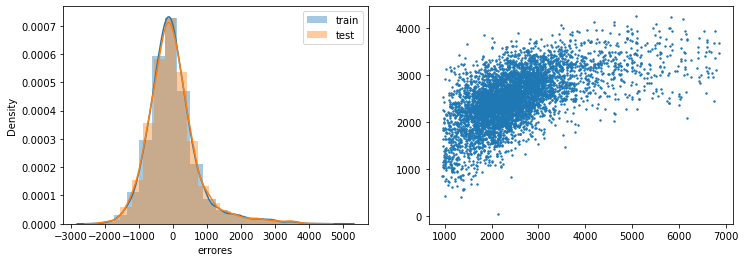

In [665]:
Escenario6 = model_ev(X_train,X_test,y_train,y_test, model_ameneties)


In [666]:
model_ev_cv(model_ameneties,"Escenario 2 - RegLineal Datos Sin Outliers Escalados", X_test, y_test,10)

Escenario 2 - RegLineal Datos Sin Outliers Escalados 
 MAE TEST: 535.3124491498207, MAE TRAIN:  530.692349538094


In [669]:
pd.DataFrame({
    'Escenario 1': Escenario1, 
    'Escenario 2': Escenario2, 
    'Escenario 3': Escenario3,
    'Escenario 4': Escenario4,
    'Escenario 5': Escenario5,
    'Escenario 6': Escenario6
})

,Escenario 1,Escenario 2,Escenario 3,Escenario 4,Escenario 5,Escenario 6
MAE TRAIN,1647.05,527.58,533.01,533.00,532.96,527.58
MAE TEST,1430.20,534.80,531.71,531.70,531.63,534.80
R^2_ajt(train),0.00,0.35,0.32,0.32,0.32,0.35
R^2_ajt(test),0.01,0.35,0.33,0.33,0.33,0.35


Aumentando la complejidad sumando las amenities se mejoro levemente el R2 Ajustado y el MAE. Sin embargo la diferencia no es tan drástica como para sumar tanta complejidad a lo realizado. 
A modo descriptivo de analiizan las columnas que podrian tener mayor importancia para futuras modelaciones, es decir deberiamos encontrar la combinacion de features que maximice el R2 y a la vez minimize el MAE.

In [668]:
def get_stats():
    x = X
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:          precio_per_m2   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              26.56
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                   7.74e-159
Time:                        17:28:52   Log-Likelihood:                     -1.7624e+05
No. Observations:               18981   AIC:                                  3.525e+05
Df Residuals:                   18948   BIC:                                  3.528e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

```
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lat                     308.4378     19.722     15.639      0.000     269.781     347.095
lon                     194.5574     19.797      9.828      0.000     155.753     233.362
surface_covered_in_m2   548.7020     68.496      8.011      0.000     414.444     682.960
surface_total_fixed    -561.1634     68.869     -8.148      0.000    -696.154    -426.173
Q2                       15.6305     12.860      1.215      0.224      -9.576      40.837
Q3                       36.3134     12.984      2.797      0.005      10.864      61.763
Q4                       65.2632     13.060      4.997      0.000      39.664      90.862
Q5                      137.4535     12.646     10.869      0.000     112.666     162.241
apartment                 3.6920     14.270      0.259      0.796     -24.278      31.662
house                    10.0699     12.112      0.831      0.406     -13.671      33.811
store                    -3.4973     11.694     -0.299      0.765     -26.418      19.424
pileta                   36.3183     10.637      3.414      0.001      15.468      57.168
nuevo                    28.2919     14.032      2.016      0.044       0.787      55.797
amenities                36.4420     11.098      3.284      0.001      14.689      58.195
monoamb                   1.1344     13.699      0.083      0.934     -25.716      27.985
aptoprof                -11.9549     11.509     -1.039      0.299     -34.513      10.604
contrafrente             -6.5752     12.239     -0.537      0.591     -30.565      17.415
SUM                       7.3069      9.968      0.733      0.464     -12.231      26.845
calefa                   -1.5072      9.800     -0.154      0.878     -20.716      17.702
terraza                  -7.2276     11.467     -0.630      0.529     -29.705      15.250
parrilla                  1.0662      9.735      0.110      0.913     -18.016      20.149
galeria                 -18.0986      9.696     -1.867      0.062     -37.104       0.907
jardin_patio            -20.9480     13.067     -1.603      0.109     -46.560       4.664
lavadero                -15.3467     11.619     -1.321      0.187     -38.122       7.428
balcon                   12.3387     15.726      0.785      0.433     -18.486      43.164
gym                      19.4773      9.653      2.018      0.044       0.556      38.398
jacuzzi                   1.0779      9.613      0.112      0.911     -17.765      19.920
toillette                 9.6998     11.241      0.863      0.388     -12.333      31.733
en_suite                 59.5320     11.183      5.323      0.000      37.612      81.452
baulera                  26.6725     10.746      2.482      0.013       5.609      47.736
escritorio               -4.0532     10.554     -0.384      0.701     -24.741      16.634
al_frente               -14.3218     14.995     -0.955      0.340     -43.714      15.070
esq_av                   -1.5322     12.589     -0.122      0.903     -26.208      23.144
Q2                       15.6305     12.860      1.215      0.224      -9.576      40.837
Q3                       36.3134     12.984      2.797      0.005      10.864      61.763
Q4                       65.2632     13.060      4.997      0.000      39.664      90.862
Q5                      137.4535     12.646     10.869      0.000     112.666     162.241
apartment                 3.6920     14.270      0.259      0.796     -24.278      31.662
house                    10.0699     12.112      0.831      0.406     -13.671      33.811
store                    -3.4973     11.694     -0.299      0.765     -26.418      19.424
pileta                   36.3183     10.637      3.414      0.001      15.468      57.168
nuevo                    28.2919     14.032      2.016      0.044       0.787      55.797
amenities                36.4420     11.098      3.284      0.001      14.689      58.195
monoamb                   1.1344     13.699      0.083      0.934     -25.716      27.985
aptoprof                -11.9549     11.509     -1.039      0.299     -34.513      10.604
contrafrente             -6.5752     12.239     -0.537      0.591     -30.565      17.415
SUM                       7.3069      9.968      0.733      0.464     -12.231      26.845
calefa                   -1.5072      9.800     -0.154      0.878     -20.716      17.702
terraza                  -7.2276     11.467     -0.630      0.529     -29.705      15.250
parrilla                  1.0662      9.735      0.110      0.913     -18.016      20.149
galeria                 -18.0986      9.696     -1.867      0.062     -37.104       0.907
jardin_patio            -20.9480     13.067     -1.603      0.109     -46.560       4.664
lavadero                -15.3467     11.619     -1.321      0.187     -38.122       7.428
balcon                   12.3387     15.726      0.785      0.433     -18.486      43.164
gym                      19.4773      9.653      2.018      0.044       0.556      38.398
jacuzzi                   1.0779      9.613      0.112      0.911     -17.765      19.920
toillette                 9.6998     11.241      0.863      0.388     -12.333      31.733
en_suite                 59.5320     11.183      5.323      0.000      37.612      81.452
baulera                  26.6725     10.746      2.482      0.013       5.609      47.736
escritorio               -4.0532     10.554     -0.384      0.701     -24.741      16.634
al_frente               -14.3218     14.995     -0.955      0.340     -43.714      15.070
esq_av                   -1.5322     12.589     -0.122      0.903     -26.208      23.144
```